Filtering annotated variants to extract small variants for ML

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from tqdm import tqdm 
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.chdir( '/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/')

In [2]:
# Function to open and load config file for filtering columns and rows
def get_col_configs(config_f):
    with open(config_f) as fh:
        config_dict = yaml.safe_load(fh)

    # print(config_dict)
    return config_dict


In [173]:
# Load the config file as dictionary
config_f = "../configs/col_config.yaml"
config_dict = get_col_configs(config_f)

In [12]:
config_dict["raw_cols"]

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'DExTR_Adipose_Tissue',
 'DExTR_Muscle',
 'DExTR_Blood_Vessel',
 'DExTR_Heart',
 'DExTR_Uterus',
 'DExTR_Vagina',
 'DExTR_Breast',
 'DExTR_Skin',
 'DExTR_Salivary_Gland',
 'DExTR_Brain',
 'DExTR_Adrenal_Gland',
 'DExTR_Thyroid',
 'DExTR_Lung',
 'DExTR_Spleen',
 'DExTR_Pancreas',
 'DExTR_Esophagus',
 'DExTR_Stomach',
 'DExTR_Colon',
 'DExTR_Small_Intestine',
 'DExTR_Prostate',
 'DExTR_Testis',
 'DExTR_Nerve',
 'DExTR_Blood',
 'DExTR_Pituitary',
 'DExTR_Ovary',
 'DExTR_Liver',
 'DExTR_Kidney',
 'DExTR_Cervix_Uteri',
 'DExTR_Fallopian_Tube',
 'DExTR_Bladder',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd_exome.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.clinical_a_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inherita

In [6]:
#print('Loading data...')
#df = pd.read_csv("./interim/clinvar_parsed.csv.gz", usecols=config_dict["display_cols"], low_memory=False)
#print('Data Loaded !....')

In [4]:
print('Loading data...')
df = pd.read_csv("./interim/clinvar_parsed.csv.gz", low_memory=False) #, usecols=config_dict["raw_cols"]
print('Data Loaded !....')


Loading data...
Data Loaded !....


In [5]:
df.columns.to_list()

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'DExTR_Adipose_Tissue',
 'DExTR_Muscle',
 'DExTR_Blood_Vessel',
 'DExTR_Heart',
 'DExTR_Uterus',
 'DExTR_Vagina',
 'DExTR_Breast',
 'DExTR_Skin',
 'DExTR_Salivary_Gland',
 'DExTR_Brain',
 'DExTR_Adrenal_Gland',
 'DExTR_Thyroid',
 'DExTR_Lung',
 'DExTR_Spleen',
 'DExTR_Pancreas',
 'DExTR_Esophagus',
 'DExTR_Stomach',
 'DExTR_Colon',
 'DExTR_Small_Intestine',
 'DExTR_Prostate',
 'DExTR_Testis',
 'DExTR_Nerve',
 'DExTR_Blood',
 'DExTR_Pituitary',
 'DExTR_Ovary',
 'DExTR_Liver',
 'DExTR_Kidney',
 'DExTR_Cervix_Uteri',
 'DExTR_Fallopian_Tube',
 'DExTR_Bladder',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd_exome.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.clinical_a_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inherita

In [10]:
#df = df[config_dict["raw_cols"]]

In [96]:
df.shape

(10695155, 157)

In [14]:
#df = df.replace(['.','-'], np.nan)

In [7]:
df['so'] = df['consequence']

In [8]:
df.dtypes

transcript                                  object
gene                                        object
consequence                                 object
protein_hgvs                                object
cdna_hgvs                                   object
DExTR_Adipose_Tissue                       float64
DExTR_Muscle                               float64
DExTR_Blood_Vessel                         float64
DExTR_Heart                                float64
DExTR_Uterus                               float64
DExTR_Vagina                               float64
DExTR_Breast                               float64
DExTR_Skin                                 float64
DExTR_Salivary_Gland                       float64
DExTR_Brain                                float64
DExTR_Adrenal_Gland                        float64
DExTR_Thyroid                              float64
DExTR_Lung                                 float64
DExTR_Spleen                               float64
DExTR_Pancreas                 

In [10]:
#df['fathmm.fathmm_score'].unique()
df["fathmm.fathmm_score"] = df["fathmm.fathmm_score"].replace(['.'], np.nan)
df["fathmm.fathmm_score"] = pd.to_numeric(df["fathmm.fathmm_score"])

In [11]:
original = df.copy()

In [95]:
#df = original.copy()

In [97]:
#Drop variants with leass than 30% of data along with duplicates. Also delete columns with all null values.
print('Dropping empty columns and rows along with duplicate rows...')
#df.dropna(axis=1, thresh=(df.shape[0]*0.15), inplace=True)  #thresh=(df.shape[0]/4)
df.dropna(axis=0, thresh=(df.shape[1]*0.3), inplace=True)  #thresh=(df.shape[1]*0.3),   how='all',
df.drop_duplicates()
df.dropna(axis=1, how='all', inplace=True)  #thresh=(df.shape[0]/4)
print('\nData shape =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())
print('\nclinvar_confidence:\n', df['clinvar.sig_conf'].value_counts())
print('\nclingen_classification:\n', df['clingen.classification'].value_counts())

Dropping empty columns and rows along with duplicate rows...

Data shape = (10695155, 157)

clinvar_CLNSIG:
 Uncertain significance                                                  3599644
Likely benign                                                           1971340
Benign                                                                   758673
Pathogenic                                                               603032
Conflicting interpretations of pathogenicity                             459843
Likely pathogenic                                                        338989
Benign/Likely benign                                                     173228
Pathogenic/Likely pathogenic                                              91169
not provided                                                              77640
drug response                                                              8964
other                                                                      4644
risk factor


clingen_classification:
 Definitive                                                                                                                                                                                1544051
Limited                                                                                                                                                                                    624564
Definitive;Definitive                                                                                                                                                                      361395
Disputed                                                                                                                                                                                   269620
Moderate                                                                                                                                                                                   150246
Defi

In [13]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']].tail(10)

In [14]:
#df[df['clinvar.sig_conf'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]

In [15]:
#print(len(df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']].head()

In [16]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['mutationtaster.prediction',
 'prec.stat',
 'clingen.classification',
 'dbsnp.rsid',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'omim.omim_id',
 'repeat.repeatclass',
 'coding',
 'chrom',
 'mitomap.status',
 'clinvar.rev_stat',
 'protein_hgvs',
 'genehancer.feature_name',
 'uniprot.acc',
 'sift.confidence',
 'exac_gene.exac_cnv_flag',
 'mutationtaster.model',
 'ref_base',
 'cdna_hgvs',
 'aloft.pred',
 'transcript',
 'clinvar.sig_conf',
 'clingen.disease',
 'ensembl_regulatory_build.region',
 'clinvar.sig',
 'aloft.conf',
 'so',
 'ccre_screen.bound',
 'cgc.class',
 'consequence',
 'gene',
 'alt_base',
 'cgc.inheritance',
 'aloft.affect',
 'dgi.interaction',
 'cgd.inheritance']

In [17]:
len(list(set(df.columns) - set(num_cols)))

37

In [18]:
df[list(set(df.columns) - set(num_cols))].head()

,mutationtaster.prediction,prec.stat,clingen.classification,dbsnp.rsid,gtex.gtex_tissue,ccre_screen._group,omim.omim_id,repeat.repeatclass,coding,chrom,...,so,ccre_screen.bound,cgc.class,consequence,gene,alt_base,cgc.inheritance,aloft.affect,dgi.interaction,cgd.inheritance
0,Polymorphism,NaN,NaN,rs781394307,NaN,NaN,NaN,NaN,Yes,chr1,...,missense_variant,NaN,NaN,missense_variant,OR4F5,G,NaN,NaN,NaN,NaN
2,Polymorphism,NaN,NaN,rs1570409925,NaN,NaN,NaN,NaN,Yes,chr1,...,missense_variant,NaN,NaN,missense_variant,OR4F5,G,NaN,NaN,NaN,NaN
4,Polymorphism,NaN,NaN,rs766444643,NaN,NaN,NaN,NaN,Yes,chr1,...,missense_variant,NaN,NaN,missense_variant,OR4F5,A,NaN,NaN,NaN,NaN
6,Polymorphism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,chr1,...,missense_variant,NaN,NaN,missense_variant,OR4F5,C,NaN,NaN,NaN,NaN
8,Polymorphism,NaN,NaN,rs778633020,NaN,NaN,NaN,NaN,Yes,chr1,...,missense_variant,NaN,NaN,missense_variant,OR4F5,C,NaN,NaN,NaN,NaN


In [25]:
#df[df['fathmm.fathmm_score'].str.contains('&') == True]['fathmm.fathmm_score']

Series([], Name: fathmm.fathmm_score, dtype: object)

In [19]:
df['exac_gene.exac_cnv_flag'].value_counts()

N    8219609
Y     773110
Name: exac_gene.exac_cnv_flag, dtype: int64

### Get data for training

In [98]:
#Filter variants for clinvar_review
df= df.loc[df['clinvar.rev_stat'].isin(config_dict['CLNREVSTAT'])]
df= df.loc[df['clinvar.sig'].isin(config_dict['train_ClinicalSignificance'])]
print('\nData shape =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())


Data shape = (1593226, 157)

clinvar_CLNSIG:
 Uncertain significance          738536
Likely benign                   275278
Benign/Likely benign            167905
Benign                          152721
Pathogenic                      138595
Pathogenic/Likely pathogenic     86111
Likely pathogenic                34080
Name: clinvar.sig, dtype: int64

clinvar_review:
 criteria provided, multiple submitters, no conflicts    1511617
reviewed by expert panel                                  81514
practice guideline                                           95
Name: clinvar.rev_stat, dtype: int64


In [99]:
pd.pivot_table(df, values='clinvar.rev_stat', index='clinvar.sig', #columns='clinvar.sig',
                          aggfunc='count')

,clinvar.rev_stat
clinvar.sig,
Benign,152721
Benign/Likely benign,167905
Likely benign,275278
Likely pathogenic,34080
Pathogenic,138595
Pathogenic/Likely pathogenic,86111
Uncertain significance,738536


In [100]:
#Filter variants for clinvar_review
#df= df.loc[df['clinvar.rev_stat'].isin(config_dict['CLNREVSTAT'])]
#df= df.loc[df['clinvar.sig'].isin(config_dict['ClinicalSignificance'])]
#print('\nData shape (nsSNV) =', df.shape)
#print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
#print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())

In [101]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))

In [102]:
df['class'] = ''

In [103]:
conditions = [
    #(df['clinvar.sig'] == 'Conflicting interpretations of pathogenicity') & df['clinvar.sig_conf'].str.contains('athogen'),
    (df['clinvar.sig'] == 'Likely benign') | (df['clinvar.sig'] == 'Benign') | (df['clinvar.sig'] == 'Benign/Likely benign'),
    (df['clinvar.sig'] == 'Likely pathogenic') | (df['clinvar.sig'] == 'Pathogenic') | (df['clinvar.sig'] == 'Pathogenic/Likely pathogenic'),
    
]

values = ['low_impact', 'high_impact']

df['class'] = np.select(conditions, values)
df= df.loc[df['class'].isin(['low_impact', 'high_impact'])]
print('\nData shape =', df.shape)
print('\nClasses:\n', df['class'].value_counts())


Data shape = (854690, 158)

Classes:
 low_impact     595904
high_impact    258786
Name: class, dtype: int64


In [104]:
df['class'].unique()

array(['low_impact', 'high_impact'], dtype=object)

In [32]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False)

,consequence
so,
synonymous_variant,226849
intron_variant,140712
missense_variant,110789
"NMD_transcript_variant,3_prime_UTR_variant",40430
stop_gained,40422
processed_transcript,29568
frameshift_truncation,27667
"intron_variant,lnc_RNA",26441
"intron_variant,NMD_transcript_variant",21666


In [105]:
syn = df[(df['consequence'].str.contains('synonymous_variant'))]
print('\nData shape =', syn.shape)
print('\nClasses:\n', syn['class'].value_counts())


Data shape = (238096, 158)

Classes:
 low_impact     237059
high_impact      1037
Name: class, dtype: int64


In [106]:
syn = df[(df['consequence'].str.contains('missense_variant'))]
print('\nData shape =', syn.shape)
print('\nClasses:\n', syn['class'].value_counts())


Data shape = (120647, 158)

Classes:
 low_impact     72593
high_impact    48054
Name: class, dtype: int64


In [107]:
syn = df[(df['consequence'].str.contains('intron_variant'))]
print('\nData shape =', syn.shape)
print('\nClasses:\n', syn['class'].value_counts())


Data shape = (230640, 158)

Classes:
 low_impact     168383
high_impact     62257
Name: class, dtype: int64


In [56]:
syn[syn['class']=='high_impact'].head()

,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,coding,...,gnomad_gene.lof_z,gnomad_gene.mis_z,gnomad_gene.syn_z,gnomad_gene.pLI,gnomad_gene.pRec,gnomad_gene.pNull,gnomad3.af,phi.phi,so,class
24085,ENST00000338660,VWA1,synonymous_variant,p.Leu51=,c.153C>G,chr1,1437401,C,G,Yes,...,0.25325,0.025385,-1.64600,0.032959,6.255300e-01,3.415200e-01,NaN,0.15857,synonymous_variant,high_impact
66427,ENST00000303635,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,7.51560,3.358400,0.72387,1.000000,1.262300e-08,7.690600e-25,0.000007,0.23599,synonymous_variant,high_impact
66428,ENST00000467404,CAMTA1,synonymous_variant,p.Glu90=,c.270G>A,chr1,6825210,G,A,Yes,...,0.62723,1.325100,0.49386,0.049383,6.996100e-01,2.510100e-01,0.000007,0.23599,synonymous_variant,high_impact
66429,ENST00000473578,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,1.30980,1.101600,-0.92595,0.282080,6.370400e-01,8.088000e-02,0.000007,0.23599,synonymous_variant,high_impact
66432,ENST00000557126,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,1.44480,1.328200,-0.39653,0.323430,6.154600e-01,6.110800e-02,0.000007,0.23599,synonymous_variant,high_impact


In [57]:
#df[(df['consequence']=='stop_lost') & (df['class']=='low_impact')].head(50)

In [36]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False).to_csv('./interim/variant_by_type.csv')

In [42]:
pd.pivot_table(df, values='consequence', index='so', columns='clinvar.sig',
                          aggfunc='count').sort_values(by=['Benign','Pathogenic'], ascending=False)


clinvar.sig,Benign,Benign/Likely benign,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic
so,,,,,,
intron_variant,46814.0,33025.0,42200.0,1554.0,12519.0,4600.0
synonymous_variant,31516.0,49499.0,145041.0,168.0,308.0,317.0
missense_variant,22992.0,31239.0,13257.0,8428.0,14469.0,20404.0
"intron_variant,NMD_transcript_variant",6173.0,4464.0,7242.0,596.0,1775.0,1416.0
processed_transcript,5201.0,5889.0,8388.0,1099.0,5127.0,3864.0
"NMD_transcript_variant,3_prime_UTR_variant",5026.0,6573.0,12529.0,1368.0,9567.0,5367.0
3_prime_UTR_variant,4880.0,3314.0,2370.0,181.0,531.0,436.0
2kb_downstream_variant,4112.0,3652.0,4069.0,528.0,1804.0,1661.0
"intron_variant,processed_transcript",3829.0,2989.0,3450.0,1025.0,2038.0,1548.0


In [108]:
y = df['class']
X = df.drop('class', axis=1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=41, test_size=0.20
)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, stratify=y_train, random_state=41, test_size=0.20
#)

In [110]:
print('\nTrain data shape =\n', y_train.value_counts())
#print('\nValidation data shape =', y_val.value_counts())
print('\nTest data shape =\n', y_test.value_counts())



Train data shape =
 low_impact     476723
high_impact    207029
Name: class, dtype: int64

Test data shape =
 low_impact     119181
high_impact     51757
Name: class, dtype: int64


In [50]:

pd.pivot_table(pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)

class,high_impact,low_impact
so,,
synonymous_variant,622.0,180950.0
intron_variant,14947.0,97595.0
missense_variant,34759.0,53949.0
"NMD_transcript_variant,3_prime_UTR_variant",13115.0,19328.0
processed_transcript,8092.0,15620.0
"intron_variant,lnc_RNA",6881.0,14354.0
"intron_variant,NMD_transcript_variant",3049.0,14324.0
2kb_downstream_variant,3171.0,9438.0
"NMD_transcript_variant,synonymous_variant",188.0,8774.0


In [51]:
pd.pivot_table(pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)


class,high_impact,low_impact
so,,
synonymous_variant,171.0,45106.0
intron_variant,3726.0,24444.0
missense_variant,8542.0,13539.0
"NMD_transcript_variant,3_prime_UTR_variant",3187.0,4800.0
processed_transcript,1998.0,3858.0
"intron_variant,NMD_transcript_variant",738.0,3555.0
"intron_variant,lnc_RNA",1652.0,3554.0
2kb_downstream_variant,822.0,2395.0
"NMD_transcript_variant,synonymous_variant",55.0,2199.0


In [52]:
#pd.pivot_table(pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
#                          aggfunc='count')


In [111]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

transcript                                      0
gene                                            0
consequence                                     0
protein_hgvs                               320475
cdna_hgvs                                   86255
DExTR_Adipose_Tissue                        98380
DExTR_Muscle                                98380
DExTR_Blood_Vessel                          98380
DExTR_Heart                                 98380
DExTR_Uterus                                98380
DExTR_Vagina                                98380
DExTR_Breast                                98380
DExTR_Skin                                  98380
DExTR_Salivary_Gland                        98380
DExTR_Brain                                 98380
DExTR_Adrenal_Gland                         98380
DExTR_Thyroid                               98380
DExTR_Lung                                  98380
DExTR_Spleen                                98380
DExTR_Pancreas                              98380


In [112]:
X_train.dropna(axis=1, how='all', inplace=True)

In [115]:
X_train['clinvar.sig_conf']=''

In [116]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

transcript                                      0
gene                                            0
consequence                                     0
protein_hgvs                               320475
cdna_hgvs                                   86255
DExTR_Adipose_Tissue                        98380
DExTR_Muscle                                98380
DExTR_Blood_Vessel                          98380
DExTR_Heart                                 98380
DExTR_Uterus                                98380
DExTR_Vagina                                98380
DExTR_Breast                                98380
DExTR_Skin                                  98380
DExTR_Salivary_Gland                        98380
DExTR_Brain                                 98380
DExTR_Adrenal_Gland                         98380
DExTR_Thyroid                               98380
DExTR_Lung                                  98380
DExTR_Spleen                                98380
DExTR_Pancreas                              98380


In [117]:
config_dict['id_cols']

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'clingen.disease',
 'clingen.classification',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'ncbigene.entrez',
 'omim.omim_id',
 'uniprot.acc',
 'dbsnp.rsid']

In [118]:
# Drop variant info columns so we can perform one-hot encoding
var = X_train[config_dict['id_cols']]
X_train = X_train.drop(config_dict['id_cols'], axis=1)

In [119]:
#for key in tqdm(X_train.columns):
#            try:
#                X_train[key] = (
#                    X_train[key]
#                    .astype("float64")
#                )
#            except:
#                X_train[key] = X_train[key]

In [120]:
X_train.shape

(683752, 138)

In [58]:
# Check if there are any categorical columns
num_cols = X_train._get_numeric_data().columns

list(set(X_train.columns) - set(num_cols))

['mutationtaster.prediction',
 'prec.stat',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'repeat.repeatclass',
 'coding',
 'mitomap.status',
 'genehancer.feature_name',
 'sift.confidence',
 'exac_gene.exac_cnv_flag',
 'mutationtaster.model',
 'aloft.pred',
 'ensembl_regulatory_build.region',
 'clinvar.sig',
 'aloft.conf',
 'so',
 'ccre_screen.bound',
 'cgc.class',
 'cgc.inheritance',
 'aloft.affect',
 'dgi.interaction',
 'cgd.inheritance']

In [59]:
X_train[list(set(X_train.columns) - set(num_cols))].head()

,mutationtaster.prediction,prec.stat,gtex.gtex_tissue,ccre_screen._group,repeat.repeatclass,coding,mitomap.status,genehancer.feature_name,sift.confidence,exac_gene.exac_cnv_flag,...,ensembl_regulatory_build.region,clinvar.sig,aloft.conf,so,ccre_screen.bound,cgc.class,cgc.inheritance,aloft.affect,dgi.interaction,cgd.inheritance
4355717,Damaging,recessive,NaN,NaN,NaN,Yes,NaN,NaN,High,NaN,...,NaN,Likely benign,NaN,missense_variant,NaN,NaN,NaN,NaN,NaN,NaN
2188891,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,Benign/Likely benign,NaN,synonymous_variant,NaN,NaN,NaN,NaN,NaN,AD
7829045,NaN,recessive,NaN,NaN,NaN,Yes,NaN,NaN,High,N,...,NaN,Likely benign,NaN,synonymous_variant,NaN,TSG,somatic/germline,NaN,NaN,NaN
10795543,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,High,Y,...,NaN,Likely benign,NaN,synonymous_variant,NaN,TSG,germline,NaN,NaN,NaN
8392648,Polymorphism,NaN,NaN,dELS,NaN,Yes,NaN,NaN,High,N,...,NaN,Benign/Likely benign,NaN,missense_variant,Yes,NaN,NaN,NaN,NaN,NaN


In [60]:
X_train['cgc.class'].value_counts()

TSG                      178606
Oncogene, TSG, fusion     11531
Oncogene                   9524
fusion                     9258
Oncogene, fusion           9109
TSG, fusion                6048
Oncogene, TSG              4035
Name: cgc.class, dtype: int64

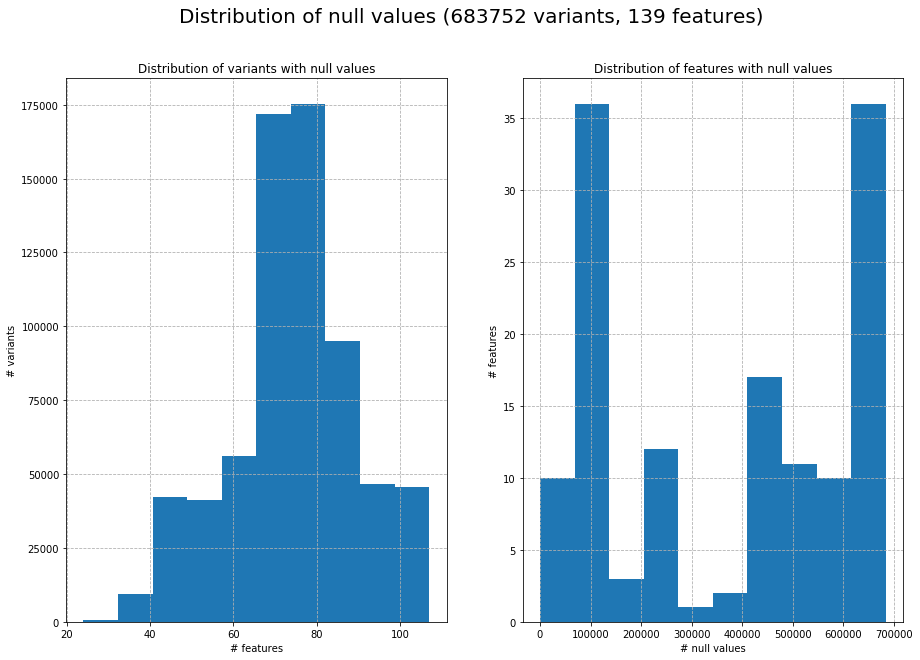

In [121]:
fig, [ax_var, ax_fts] = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Distribution of null values (683752 variants, 139 features)", fontsize=20)

#fig, ax = plt.subplots(figsize=(9, 8))
ax_var.set_title("Distribution of variants with null values")
#ax.plot(50, y, '--')
ax_var.set_xlabel('# features')
ax_var.set_ylabel('# variants')
ax_var.grid(linestyle="--")
ax_var.hist(X_train.isnull().sum(axis = 1))

#fig, ax = plt.subplots(figsize=(9, 8))
ax_fts.set_title("Distribution of features with null values")
#ax.plot(50, y, '--')
ax_fts.set_xlabel('# null values')
ax_fts.set_ylabel('# features')
ax_fts.grid(linestyle="--")
ax_fts.hist(X_train.isnull().sum(axis = 0))

#fig.tight_layout()
#for container in ax_var.containers:
#    ax_var.bar_label(container)
plt.show()


#fig.tight_layout()
#for container in ax_fts.containers:
#    ax_fts.bar_label(container)
#plt.show()

In [122]:
median_scores = X_train.median().to_dict()
median_scores

{'DExTR_Adipose_Tissue': -62.39960214,
 'DExTR_Muscle': -157.90062959999997,
 'DExTR_Blood_Vessel': -56.66313844,
 'DExTR_Heart': -192.11897009999998,
 'DExTR_Uterus': -21.69915294,
 'DExTR_Vagina': -69.25323533,
 'DExTR_Breast': -41.97212607,
 'DExTR_Skin': -20.53916321,
 'DExTR_Salivary_Gland': -76.7753792,
 'DExTR_Brain': -118.90540929999999,
 'DExTR_Adrenal_Gland': -79.11240112,
 'DExTR_Thyroid': -32.05163631,
 'DExTR_Lung': -39.878867799999995,
 'DExTR_Spleen': -67.96118139,
 'DExTR_Pancreas': -336.1687172,
 'DExTR_Esophagus': -56.00437118,
 'DExTR_Stomach': -193.8704183,
 'DExTR_Colon': -39.6943693,
 'DExTR_Small_Intestine': -42.27475377,
 'DExTR_Prostate': -54.4245231,
 'DExTR_Testis': -9.456228797,
 'DExTR_Nerve': -23.7263633,
 'DExTR_Blood': -181.1995209,
 'DExTR_Pituitary': -39.14241921,
 'DExTR_Ovary': -35.90099484,
 'DExTR_Liver': -289.111887,
 'DExTR_Kidney': -127.5745548,
 'DExTR_Cervix_Uteri': -24.99423209,
 'DExTR_Fallopian_Tube': 0.0,
 'DExTR_Bladder': -38.70179792,
 '

In [123]:
#Fill NAs in dataframe
X_train['gnomad3.af'] = X_train['gnomad3.af'].fillna(0)
X_train = X_train.fillna(X_train.median())

In [124]:
list(config_dict["dummies_sep"].keys())

['gtex.gtex_tissue',
 'dgi.interaction',
 'cgd.inheritance',
 'so',
 'repeat.repeatclass',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [125]:
#Perform one-hot encoding using sep
for key in tqdm(config_dict["dummies_sep"]):
    X_train = pd.concat((X_train , X_train[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)

X_train.shape

100%|██████████| 8/8 [01:07<00:00,  8.47s/it]


(683752, 258)

In [126]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

DExTR_Adipose_Tissue                            0
DExTR_Muscle                                    0
DExTR_Blood_Vessel                              0
DExTR_Heart                                     0
DExTR_Uterus                                    0
DExTR_Vagina                                    0
DExTR_Breast                                    0
DExTR_Skin                                      0
DExTR_Salivary_Gland                            0
DExTR_Brain                                     0
DExTR_Adrenal_Gland                             0
DExTR_Thyroid                                   0
DExTR_Lung                                      0
DExTR_Spleen                                    0
DExTR_Pancreas                                  0
DExTR_Esophagus                                 0
DExTR_Stomach                                   0
DExTR_Colon                                     0
DExTR_Small_Intestine                           0
DExTR_Prostate                                  0


In [127]:
X_train = X_train.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_train.shape

(683752, 250)

In [128]:
#Perform one-hot encoding
X_train = pd.get_dummies(X_train, prefix_sep='_')
X_train.shape

(683752, 276)

In [129]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

DExTR_Adipose_Tissue                                        0
DExTR_Muscle                                                0
DExTR_Blood_Vessel                                          0
DExTR_Heart                                                 0
DExTR_Uterus                                                0
DExTR_Vagina                                                0
DExTR_Breast                                                0
DExTR_Skin                                                  0
DExTR_Salivary_Gland                                        0
DExTR_Brain                                                 0
DExTR_Adrenal_Gland                                         0
DExTR_Thyroid                                               0
DExTR_Lung                                                  0
DExTR_Spleen                                                0
DExTR_Pancreas                                              0
DExTR_Esophagus                                             0
DExTR_St

In [89]:
#X_train = X_train.drop('mitomap.status', axis=1)

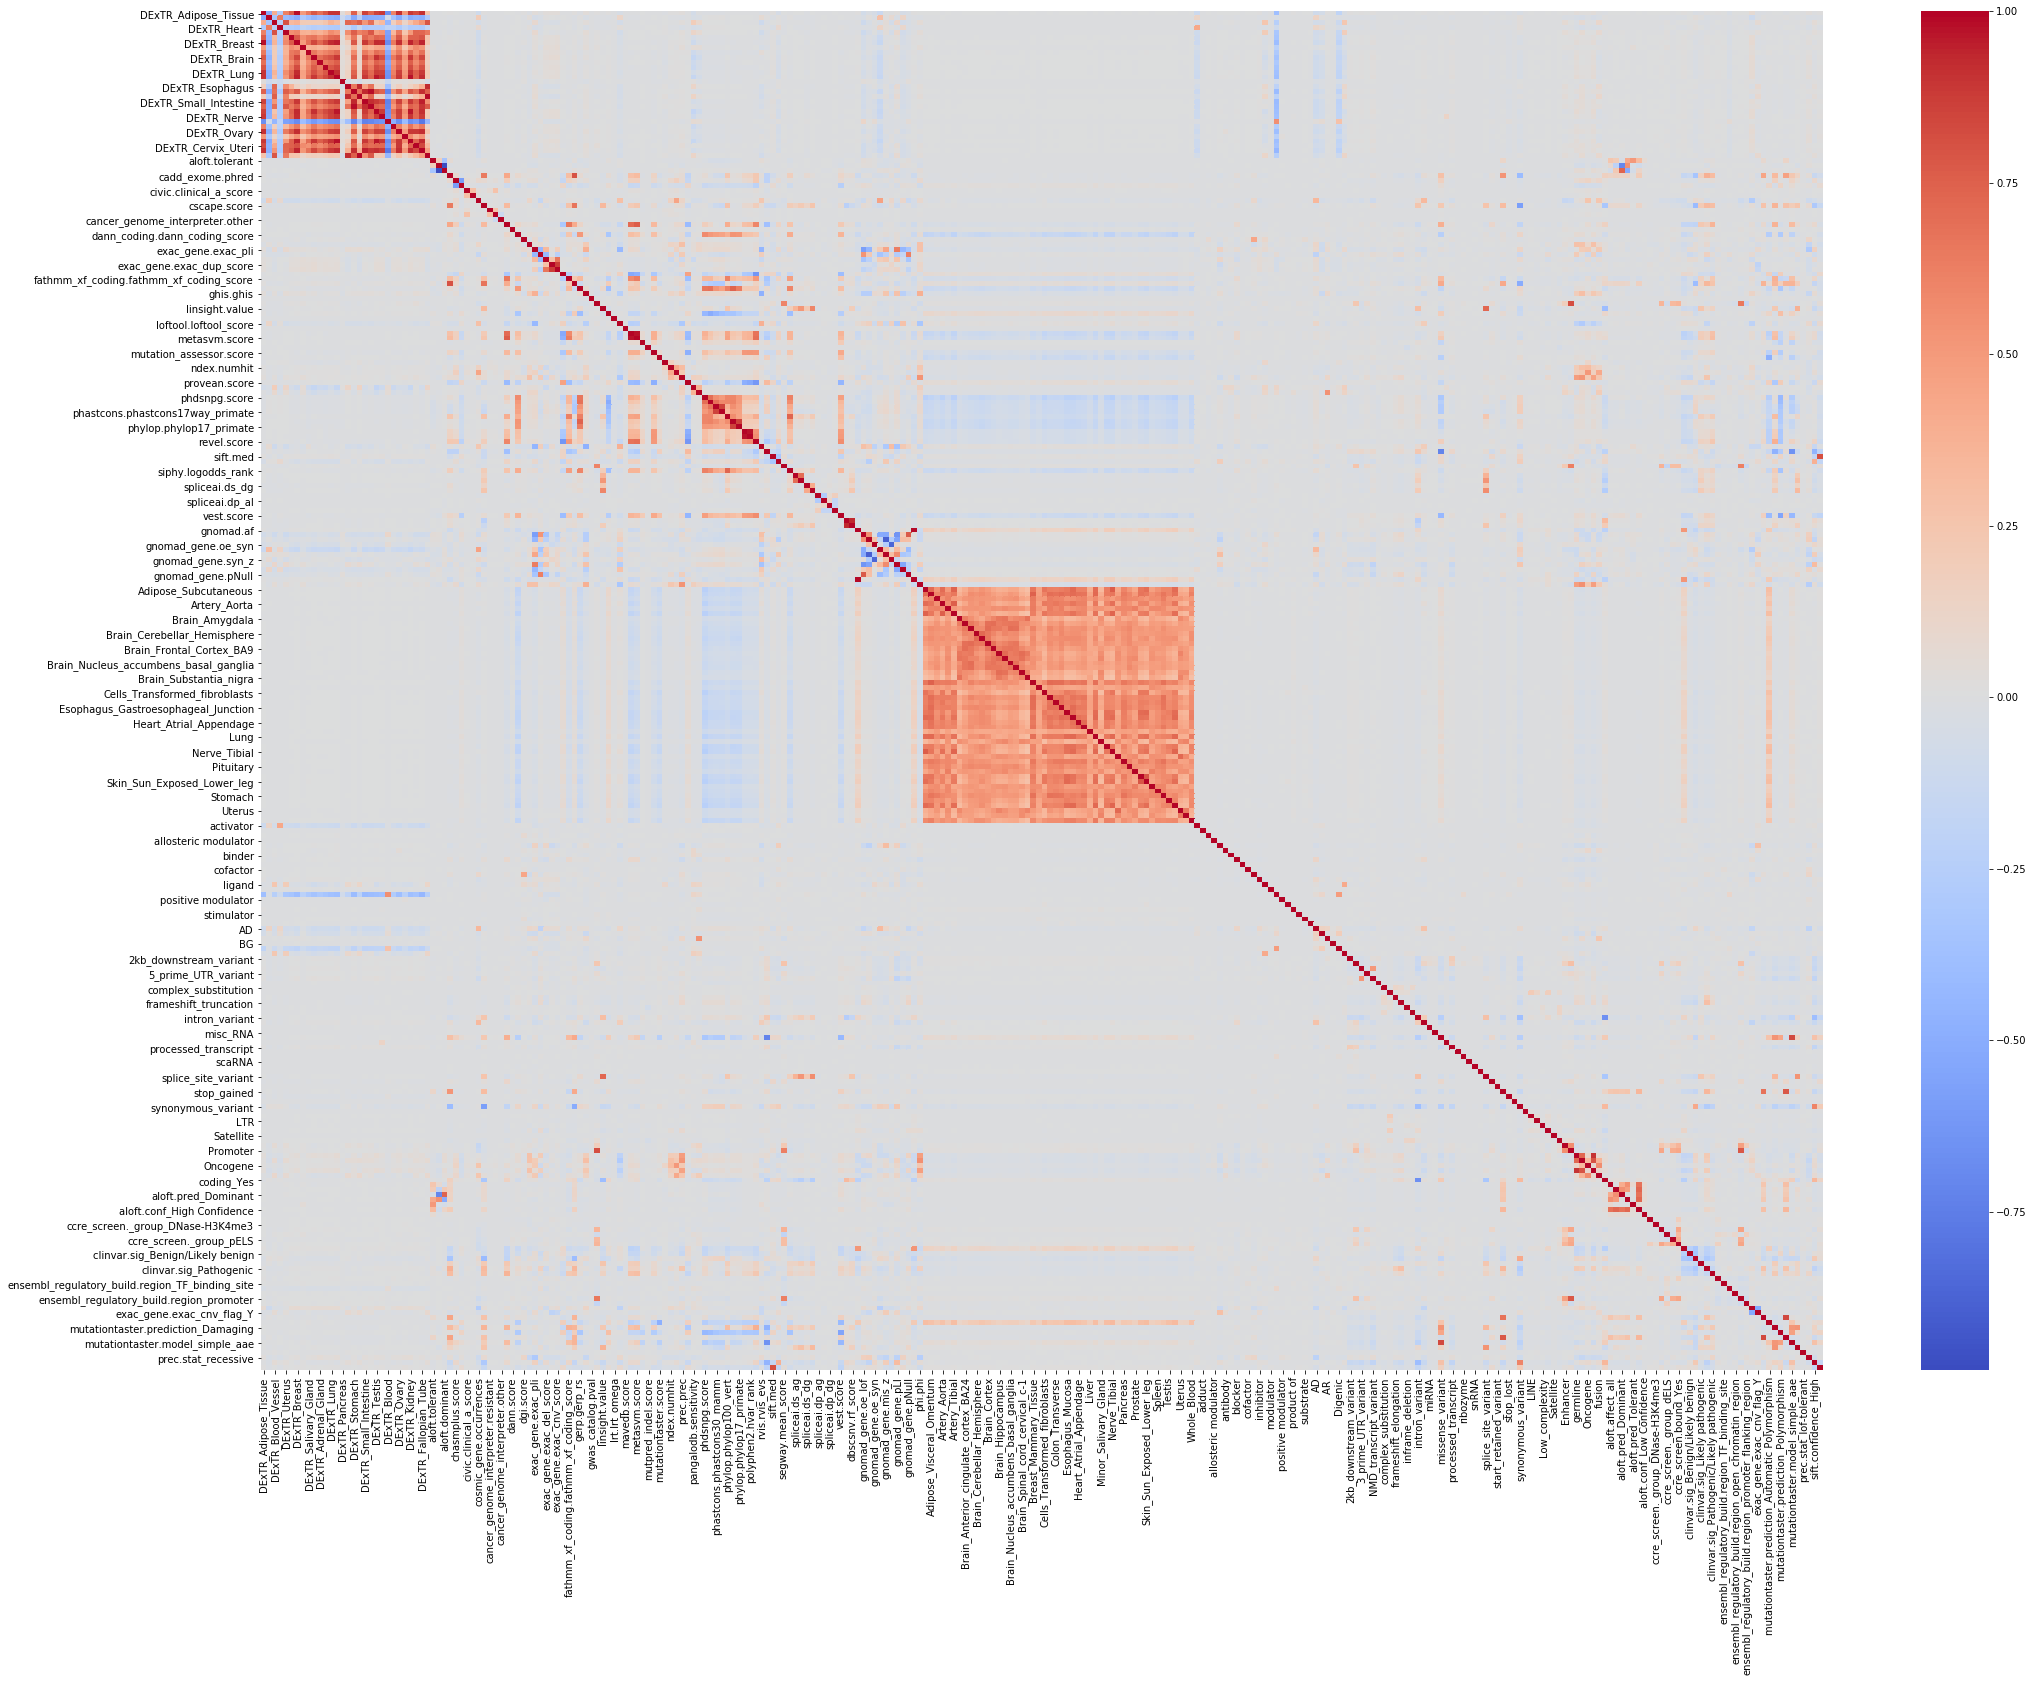

In [130]:
fig = plt.figure(figsize=(35, 25))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [131]:
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
        )



In [132]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns to be dropped: {to_drop}"
        )



11
Correlated columns to be dropped: ['DExTR_Breast', 'DExTR_Spleen', 'DExTR_Prostate', 'DExTR_Testis', 'DExTR_Kidney', 'DExTR_Fallopian_Tube', 'DExTR_Bladder', 'aloft.dominant', 'metasvm.score', 'polyphen2.hvar_rank', 'gnomad3.af']


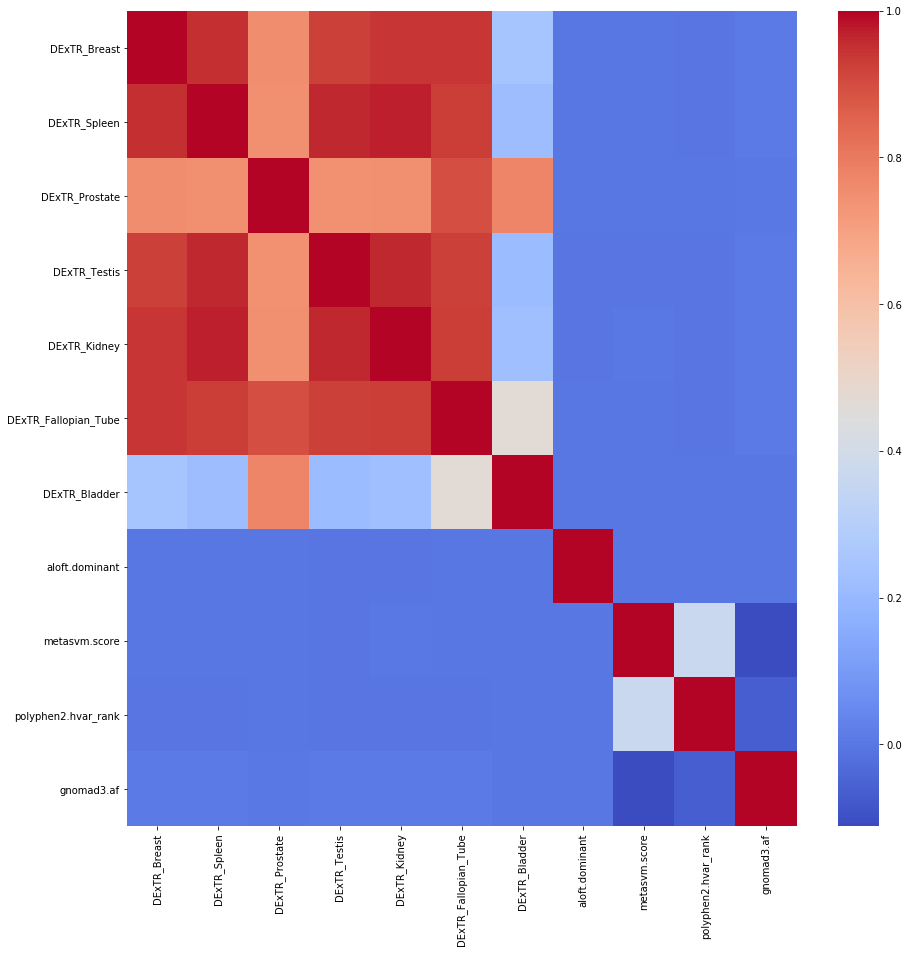

In [133]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(X_train[to_drop].corr(), fmt=".2g", cmap="coolwarm")

In [134]:
# Drop features
#df.drop(to_drop, axis=1, inplace=True)
X_train = X_train.reset_index(drop=True)
del corr_matrix, to_drop, upper, corr_matrix_abs

In [135]:
X_train.shape

(683752, 276)

In [136]:
#fig = plt.figure(figsize=(30,20))
#sns.heatmap(X_train.corr(), fmt=".2g", cmap="coolwarm")

In [137]:
#Give variant IDs and add the variant info columns
#df = df.reset_index(drop=True)
#df['ID'] = [f'var_{num}' for num in range(len(df))]
#print('NAs filled!')
X_train = pd.concat([var.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
del var

In [138]:
train_columns = X_train.columns.values.tolist()
print(train_columns)

['transcript', 'gene', 'consequence', 'protein_hgvs', 'cdna_hgvs', 'chrom', 'pos', 'ref_base', 'alt_base', 'clingen.disease', 'clingen.classification', 'clinvar.id', 'clinvar.rev_stat', 'clinvar.sig_conf', 'ncbigene.entrez', 'omim.omim_id', 'uniprot.acc', 'dbsnp.rsid', 'DExTR_Adipose_Tissue', 'DExTR_Muscle', 'DExTR_Blood_Vessel', 'DExTR_Heart', 'DExTR_Uterus', 'DExTR_Vagina', 'DExTR_Breast', 'DExTR_Skin', 'DExTR_Salivary_Gland', 'DExTR_Brain', 'DExTR_Adrenal_Gland', 'DExTR_Thyroid', 'DExTR_Lung', 'DExTR_Spleen', 'DExTR_Pancreas', 'DExTR_Esophagus', 'DExTR_Stomach', 'DExTR_Colon', 'DExTR_Small_Intestine', 'DExTR_Prostate', 'DExTR_Testis', 'DExTR_Nerve', 'DExTR_Blood', 'DExTR_Pituitary', 'DExTR_Ovary', 'DExTR_Liver', 'DExTR_Kidney', 'DExTR_Cervix_Uteri', 'DExTR_Fallopian_Tube', 'DExTR_Bladder', 'aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd_exome.phred', 'chasmplus.score', 'chasmplus.pval', 'civic.clinical_a_score', 'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape

In [139]:
print('\nData shape (After filtering) =', X_train.shape)
print('Class shape=', y_train.shape)


Data shape (After filtering) = (683752, 294)
Class shape= (683752,)


In [140]:
# Write it to a file
X_train.to_csv('./processed/train_data_80.csv.gz', index=False)
y_train.to_csv('./processed/train_data-y_80.csv.gz', index=False)

# Preparing Testing data

In [141]:
#print('\nclinvar_clnsig:\n', X_test['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', X_test['clinvar.rev_stat'].value_counts())


clinvar_review:
 criteria provided, multiple submitters, no conflicts    156102
reviewed by expert panel                                 14817
practice guideline                                          19
Name: clinvar.rev_stat, dtype: int64


In [142]:
print('\nImpact (Class):\n', y_test.value_counts())


Impact (Class):
 low_impact     119181
high_impact     51757
Name: class, dtype: int64


In [143]:
# Drop variant info columns so we can perform one-hot encoding
var = X_test[config_dict['id_cols']]
X_test = X_test.drop(config_dict['id_cols'], axis=1)

In [144]:
# Double check if there are any columns with weird formatting as categorical before performing one-hot encoding
num_cols = X_test._get_numeric_data().columns

list(set(X_test.columns) - set(num_cols))

['mutationtaster.prediction',
 'prec.stat',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'repeat.repeatclass',
 'coding',
 'mitomap.status',
 'genehancer.feature_name',
 'sift.confidence',
 'exac_gene.exac_cnv_flag',
 'mutationtaster.model',
 'aloft.pred',
 'ensembl_regulatory_build.region',
 'clinvar.sig',
 'aloft.conf',
 'so',
 'ccre_screen.bound',
 'cgc.class',
 'cgc.inheritance',
 'aloft.affect',
 'dgi.interaction',
 'cgd.inheritance']

In [145]:
X_test.shape

(170938, 139)

In [146]:
#Perform one-hot encoding
for key in tqdm(config_dict["dummies_sep"]):
    X_test = pd.concat((X_test , X_test[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
X_test = X_test.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_test = pd.get_dummies(X_test, prefix_sep='_')
X_test.shape

100%|██████████| 8/8 [00:16<00:00,  2.08s/it]


(170938, 276)

In [147]:
X_test['gnomad3.af'] = X_test['gnomad3.af'].fillna(0)

In [148]:
for key in tqdm(median_scores.keys()):
            if key in X_test.columns:
                X_test[key] = (
                    X_test[key]
                    .fillna(median_scores[key])
                    .astype("float64")
                )

100%|██████████| 117/117 [00:00<00:00, 643.65it/s]


In [149]:
X_test.columns

Index(['DExTR_Adipose_Tissue', 'DExTR_Muscle', 'DExTR_Blood_Vessel',
       'DExTR_Heart', 'DExTR_Uterus', 'DExTR_Vagina', 'DExTR_Breast',
       'DExTR_Skin', 'DExTR_Salivary_Gland', 'DExTR_Brain',
       ...
       'mutationtaster.prediction_Automatic Polymorphism',
       'mutationtaster.prediction_Damaging',
       'mutationtaster.prediction_Polymorphism',
       'mutationtaster.model_complex_aae', 'mutationtaster.model_simple_aae',
       'mutationtaster.model_without_aae', 'prec.stat_lof-tolerant',
       'prec.stat_recessive', 'sift.confidence_High', 'sift.confidence_Low'],
      dtype='object', length=276)

In [150]:
#df2 = pd.DataFrame()
for key in tqdm(train_columns):
            if key in X_test.columns:
                pass
            else:
                X_test[key] = 0

100%|██████████| 294/294 [00:00<00:00, 33087.16it/s]


In [151]:
print('\nData shape =', X_test.shape)


Data shape = (170938, 294)


In [152]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

DExTR_Adipose_Tissue                                        0
DExTR_Muscle                                                0
DExTR_Blood_Vessel                                          0
DExTR_Heart                                                 0
DExTR_Uterus                                                0
DExTR_Vagina                                                0
DExTR_Breast                                                0
DExTR_Skin                                                  0
DExTR_Salivary_Gland                                        0
DExTR_Brain                                                 0
DExTR_Adrenal_Gland                                         0
DExTR_Thyroid                                               0
DExTR_Lung                                                  0
DExTR_Spleen                                                0
DExTR_Pancreas                                              0
DExTR_Esophagus                                             0
DExTR_St

In [153]:
X_test = X_test.drop(config_dict['id_cols'], axis=1)

In [154]:
print('\nData shape =', X_test.shape)


Data shape = (170938, 276)


In [155]:
X_test.shape[0] == var.shape[0]

True

In [156]:
X_test = pd.concat([var.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

In [157]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

transcript                                                       0
gene                                                             0
consequence                                                      0
protein_hgvs                                                 80147
cdna_hgvs                                                    21454
chrom                                                            0
pos                                                              0
ref_base                                                         0
alt_base                                                         0
clingen.disease                                              77625
clingen.classification                                       77625
clinvar.id                                                       0
clinvar.rev_stat                                                 0
clinvar.sig_conf                                            170938
ncbigene.entrez                                               

In [158]:
print('\nData shape =', X_test.shape)
print('\nClass shape =', y_test.shape)


Data shape = (170938, 294)

Class shape = (170938,)


In [159]:
# Write it to a file
X_test.to_csv('./processed/test_data_20.csv.gz', index=False)
y_test.to_csv('./processed/test_data-y_20.csv.gz', index=False)

In [160]:
del X_train, X_test, df

In [161]:
df = original.copy()

In [162]:
benchmark_columns = ['chrom','pos','ref_base','alt_base','transcript','cadd_exome.phred','cscape.score','clinpred.score','dann.score','dann_coding.dann_coding_score','dgi.score','fathmm_xf_coding.fathmm_xf_coding_score','funseq2.score','linsight.value','lrt.lrt_score','loftool.loftool_score','metasvm.score','metalr.score','mutpred1.mutpred_general_score','mutpred_indel.score','mutation_assessor.score','mutationtaster.score','provean.score','phdsnpg.score','revel.score','sift.score','vest.score','dbscsnv.ada_score','dbscsnv.rf_score','clinvar.sig']
benchmark_df = df[benchmark_columns]
benchmark_df.columns = ['chrom','pos','ref_base','alt_base','transcript','CADD','Cscape','Clinpred','DANN','DANN_coding','DGI','fathmm_xf','funseq2','linsight','LRT','loftool','MetaSVM','MetaLR','Mutpred','Mutpred_indel','Mutation_assessor','Mutationtaster','Provean','phdsnpg','revel','SIFT','VEST','dbscsnv.ada_score','dbscsnv.rf_score','Clinvar']
benchmark_df.head()

,chrom,pos,ref_base,alt_base,transcript,CADD,Cscape,Clinpred,DANN,DANN_coding,...,Mutation_assessor,Mutationtaster,Provean,phdsnpg,revel,SIFT,VEST,dbscsnv.ada_score,dbscsnv.rf_score,Clinvar
0,chr1,69134,A,G,ENST00000335137,16.910,0.480042,0.004,0.957771,0.957771,...,1.54,0.998383,-3.56,0.133,0.075,0.107,0.107,NaN,NaN,NaN
2,chr1,69581,C,G,ENST00000335137,23.400,0.279863,0.998,0.996460,0.996460,...,3.13,0.992433,-8.33,0.698,0.079,0.000,0.431,NaN,NaN,NaN
4,chr1,69682,G,A,ENST00000335137,20.800,0.329402,0.161,0.996149,0.996149,...,0.84,1.000000,0.13,0.025,0.112,0.186,0.073,NaN,NaN,NaN
6,chr1,69769,T,C,ENST00000335137,22.100,0.563522,0.899,0.994064,0.994064,...,3.27,1.000000,-4.39,0.020,0.058,0.010,0.118,NaN,NaN,NaN
8,chr1,69995,G,C,ENST00000335137,8.789,0.273346,0.022,0.140583,0.140583,...,0.62,1.000000,-0.27,0.405,0.055,0.699,0.137,NaN,NaN,NaN


In [163]:
benchmark_df.shape

(10695155, 30)

In [164]:
# Write it to a file
benchmark_df.to_csv('./processed/benchmark_data.csv.gz', index=False)

In [165]:
original.so.head()

0    missense_variant
2    missense_variant
4    missense_variant
6    missense_variant
8    missense_variant
Name: so, dtype: object

In [175]:
def test_parsing(dataframe, config_dict):
    # Drop variant info columns so we can perform one-hot encoding
    var = dataframe[config_dict['id_cols']]
    dataframe = dataframe.drop(config_dict['id_cols'], axis=1)
    #dataframe = dataframe.replace(['.','-'], np.nan)
    
    #Perform one-hot encoding
    for key in tqdm(config_dict["dummies_sep"]):
        dataframe = pd.concat((dataframe , dataframe[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
    dataframe = dataframe.drop(list(config_dict["dummies_sep"].keys()), axis=1)
    dataframe = pd.get_dummies(dataframe, prefix_sep='_')
    
    for key in tqdm(list(config_dict['median_scores'].keys())):
            if key in dataframe.columns:
                dataframe[key] = (
                    dataframe[key]
                    .fillna(config_dict['median_scores'][key])
                    .astype("float64")
                )
                
    df2 = pd.DataFrame()
    for key in tqdm(config_dict["filtered_cols"]):
            if key in dataframe.columns:
                df2[key] = dataframe[key]
            else:
                df2[key] = 0
    del dataframe
              
    df2 = df2.drop(config_dict['id_cols'], axis=1)
    df2 = pd.concat([var.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
    return df2


In [176]:
len(config_dict["filtered_cols"])

294

In [185]:
df2 = test_parsing(original, config_dict)
print('\nData shape =', df2.shape)
# Write it to a file
df2.to_csv('./processed/clinvar_filtered.csv.gz', index=False)

100%|██████████| 294/294 [00:53<00:00,  5.46it/s]



Data shape = (10695155, 293)


In [186]:
list(set(df2.columns) - set(config_dict["filtered_cols"]))

[]